In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
data = load_iris()


In [4]:
x = data.data[:,[2,3]]
y = data.target

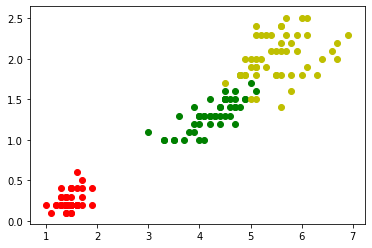

In [5]:
plt.figure()
plt.scatter(x[y==0][:, 0], x[y==0][:, 1], c='r')
plt.scatter(x[y==1][:, 0], x[y==1][:, 1], c='g')
plt.scatter(x[y==2][:, 0], x[y==2][:, 1], c='y')
plt.show()

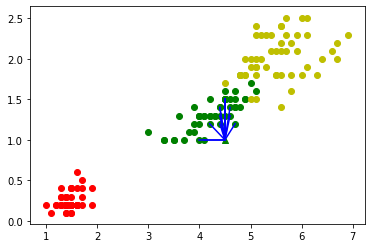

In [39]:
def classify(x_test, X, y):
    '''
    x_test: 测试数据
    X: 训练数据x
    y: 训练数据标签
    '''
    l = len(x)
    data = np.c_[x, y]
    ret = []
    for idx, pos in enumerate(data):
        dis = np.abs(x_test[0] - pos[0]) + np.abs(x_test[1] - pos[1])
        ret.append((dis, pos[2], idx))
    ret = sorted(ret, key=lambda x: x[0])[:15]
    def get_sort():
        from collections import Counter
        counter = Counter(map(lambda x: x[1], ret))
        return counter.most_common(1)
    category = get_sort()[0][0]
    
    return category,  ret



test_point = [4.5, 1]
category, choose_data = classify(test_point, x, y)

index = np.array([i[2] for i in choose_data])

choosed_point = x[index, :]
plt.figure()
plt.scatter(x[y==0][:, 0], x[y==0][:, 1], c='r')
plt.scatter(x[y==1][:, 0], x[y==1][:, 1], c='g')
plt.scatter(x[y==2][:, 0], x[y==2][:, 1], c='y')
if category == 0.:
    plt.scatter(test_point[0], test_point[1], c='r', marker='^')
elif category == 1.:
    plt.scatter(test_point[0], test_point[1], c='g', marker='^')
else:
    plt.scatter(test_point[0], test_point[1], c='y', marker='^')
for i in choosed_point:
    plt.plot([test_point[0], i[0]], [test_point[1], i[1]], c='b')
plt.show()

In [40]:
def generate_test_data(n):
    return np.array([np.array([np.random.uniform(3, 5), np.random.uniform(0, 3)]) for i in range(n)])

def generate_test_data_label(n):
    ret = []
    data =  generate_test_data(n)
    for i in range(n):
        ret.append(classify(data[i], x, y))

    return data, ret

def plot_(plt,  test_point_, category_, choosed_point_):
    li = {0.0:'r', 1.0:'g', 2.0:'y'}
    if category_ == 0.:
        plt.scatter(test_point_[0], test_point_[1], c='r', marker='^')
    elif category_ == 1.:
        plt.scatter(test_point_[0], test_point_[1], c='g', marker='^')
    else:
        plt.scatter(test_point_[0], test_point_[1], c='y', marker='^')
    for i in choosed_point_:
        plt.plot([test_point_[0], i[0]], [test_point_[1], i[1]], c='black', linewidth=0.7)



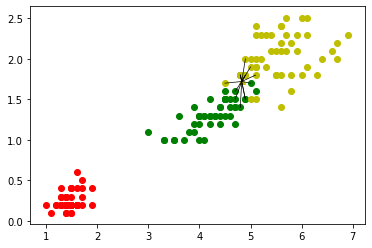

In [41]:
plt.figure()
plt.scatter(x[y==0][:, 0], x[y==0][:, 1], c='r')
plt.scatter(x[y==1][:, 0], x[y==1][:, 1], c='g')
plt.scatter(x[y==2][:, 0], x[y==2][:, 1], c='y')
N = 1
x_test, test_result_info = generate_test_data_label(N)
for i in range(N):
    index = np.array([j[2] for j in test_result_info[i][1]])
    choosed_point_ = np.c_[x,y][index, :]
    category_ = test_result_info[i][0]
    plot_(plt, x_test[i], category_, choosed_point_)
plt.show()

